In [ ]:
import pandas as pd

# Load the dataset
csv_path = 'Fraud.csv'
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

Summary Statistics:
                 step        amount  oldbalanceOrg  newbalanceOrig  \
count  586980.000000  5.869800e+05   5.869800e+05    5.869800e+05   
mean       15.192853  1.607339e+05   8.880291e+05    9.076585e+05   
std         4.882760  2.682698e+05   2.961297e+06    2.998253e+06   
min         1.000000  1.000000e-01   0.000000e+00    0.000000e+00   
25%        12.000000  1.232651e+04   0.000000e+00    0.000000e+00   
50%        15.000000  7.538371e+04   1.780300e+04    0.000000e+00   
75%        18.000000  2.148265e+05   1.572340e+05    1.956897e+05   
max        33.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    5.869790e+05    5.869790e+

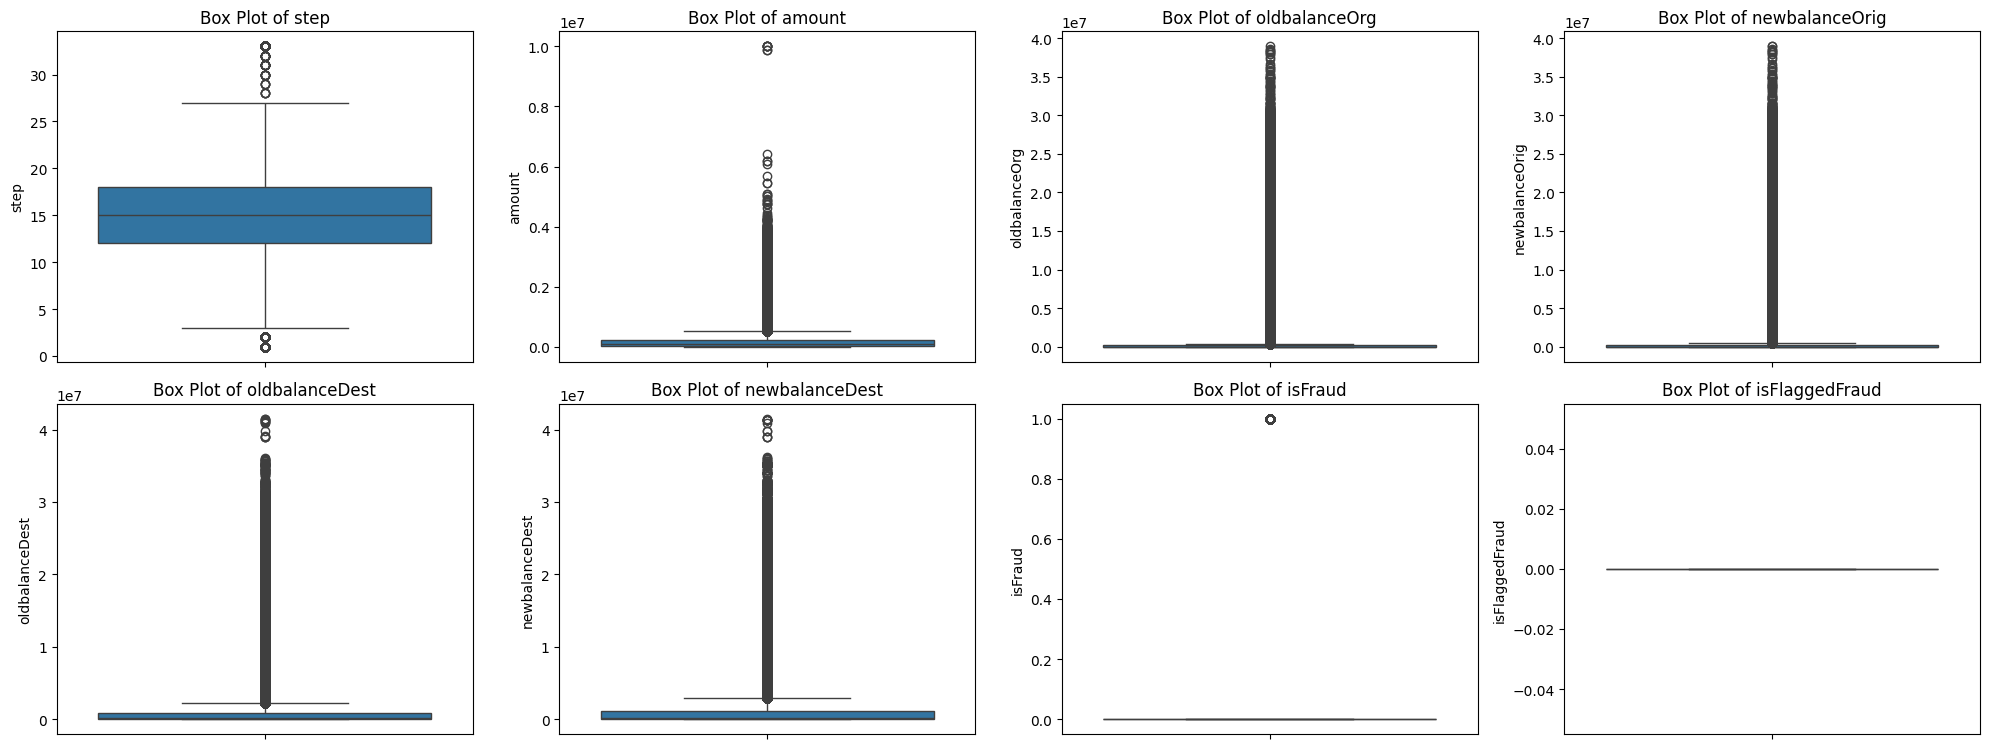

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,586980.000000,586980.000000,586980.000000,586980.000000,5.869800e+05,5.869800e+05,586980.0,586980.0
mean,15.095150,135288.882206,103755.660850,120708.379408,5.637914e+05,7.424151e+05,0.0,0.0
std,4.508562,151712.035708,150394.705558,187346.794549,7.875171e+05,1.010494e+06,0.0,0.0
min,3.000000,0.100000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0
25%,12.000000,12326.507500,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0
50%,15.000000,75383.715000,17803.000000,0.000000,1.122677e+05,2.053808e+05,0.0,0.0
75%,18.000000,214826.467500,157234.040000,195689.725000,8.888300e+05,1.170250e+06,0.0,0.0
max,27.000000,518576.407500,393085.100000,489224.312500,2.222075e+06,2.925626e+06,0.0,0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
csv_path = 'Fraud.csv'
data = pd.read_csv(csv_path)

# Display the first few rows of the dataset
data.head()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)

# Handle missing values (imputation)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify that there are no missing values left
print("Missing Values After Imputation:\n", data.isnull().sum())

# Plot box plots for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

for col in numerical_columns:
    handle_outliers(data, col)

# Verify the changes
data.describe()



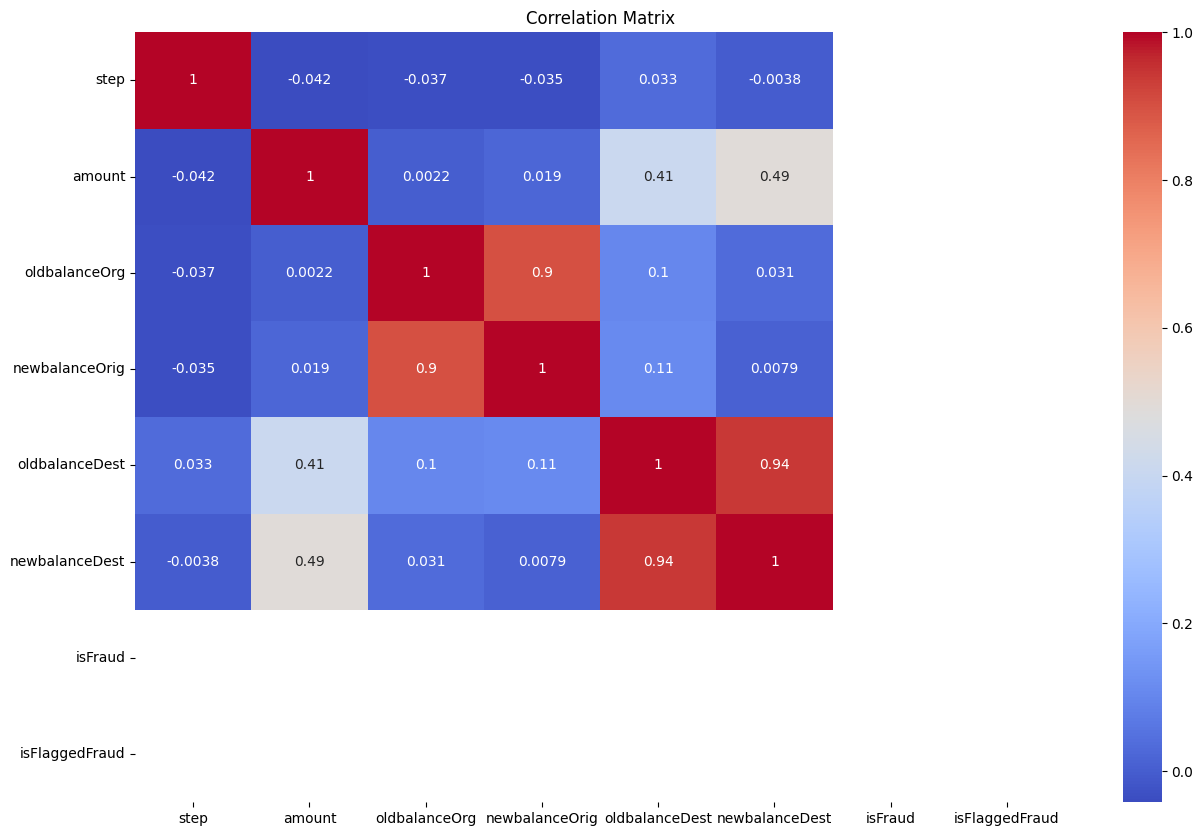

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


          feature        VIF
0            step   2.084149
1          amount   2.419377
2   oldbalanceOrg   8.008053
3  newbalanceOrig   8.138922
4  oldbalanceDest  15.762823
5  newbalanceDest  17.436521
6         isFraud        NaN
7  isFlaggedFraud        NaN
Final Set of Features:
 Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig'], dtype='object')


In [ ]:
# Ensure only numerical columns are used for correlation matrix
numeric_data = data[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF for numerical columns only
vif_data = calculate_vif(numeric_data)
print(vif_data)

# Remove highly correlated features (VIF > 10)
features_to_keep = vif_data[vif_data["VIF"] <= 10]["feature"]
numeric_data = numeric_data[features_to_keep]

# Verify the final set of features
print("Final Set of Features:\n", numeric_data.columns)


Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4252
         1.0       1.00      0.13      0.23        23

    accuracy                           1.00      4275
   macro avg       1.00      0.57      0.61      4275
weighted avg       1.00      1.00      0.99      4275

ROC-AUC: 0.957370444598961

Decision Tree Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4252
         1.0       0.50      0.52      0.51        23

    accuracy                           0.99      4275
   macro avg       0.75      0.76      0.75      4275
weighted avg       0.99      0.99      0.99      4275

ROC-AUC: 0.7594584645588777

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4252
         1.0       1.00      0.43      0.61        23

    accuracy                         

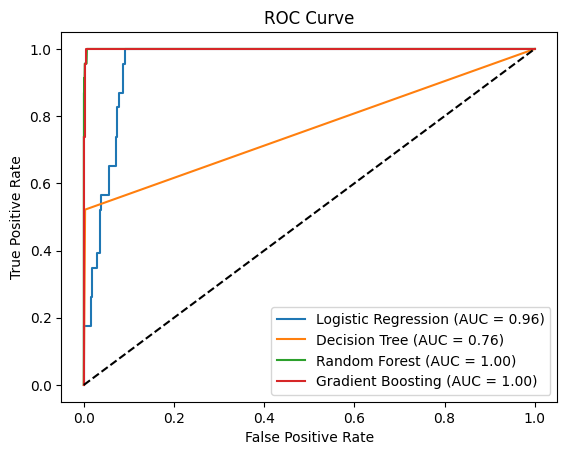

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
# Load the dataset
csv_path = 'Fraud.csv'
data = pd.read_csv(csv_path)

# Data Preprocessing
#data.fillna(data.median(), inplace=True)  # Imputation of missing values
# Data Preprocessing
# Handle missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Feature Engineering: Convert categorical features to numerical
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Normalize/Standardize features
scaler = StandardScaler()
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target
X = data.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model Selection and Training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Training models and evaluating performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    print(f"\n{model_name} Performance:")
    print(classification_report(y_val, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val, y_pred_proba)}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()




Best Model Performance after Hyperparameter Tuning:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4252
         1.0       1.00      0.48      0.65        23

    accuracy                           1.00      4275
   macro avg       1.00      0.74      0.82      4275
weighted avg       1.00      1.00      1.00      4275

ROC-AUC: 0.999488731645466


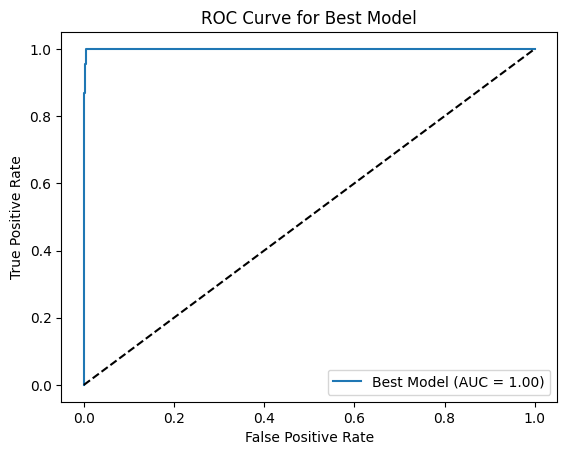

In [ ]:
from scipy.stats import randint

# Hyperparameter Tuning with RandomizedSearchCV for Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=50,
                                   cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

print("\nBest Model Performance after Hyperparameter Tuning:")
print(classification_report(y_val, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_val, y_pred_proba)}")

# Plot ROC Curve for the best model
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.plot(fpr, tpr, label=f'Best Model (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Model')
plt.legend(loc='best')
plt.show()

Feature Importances:
           Feature  Importance
5  newbalanceDest    0.222736
4  oldbalanceDest    0.218653
1          amount    0.208962
2   oldbalanceOrg    0.193011
0            step    0.065905
3  newbalanceOrig    0.044674
9   type_TRANSFER    0.020269
6   type_CASH_OUT    0.012797
8    type_PAYMENT    0.011399
7      type_DEBIT    0.001594
Selected Features:
 0              step
1            amount
2     oldbalanceOrg
3    newbalanceOrig
4    oldbalanceDest
5    newbalanceDest
6     type_CASH_OUT
7        type_DEBIT
8      type_PAYMENT
9     type_TRANSFER
Name: Feature, dtype: object

Model Performance with Selected Features:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4252
         1.0       1.00      0.13      0.23        23

    accuracy                           1.00      4275
   macro avg       1.00      0.57      0.61      4275
weighted avg       1.00      1.00      0.99      4275

ROC-AUC: 0.957370444598961


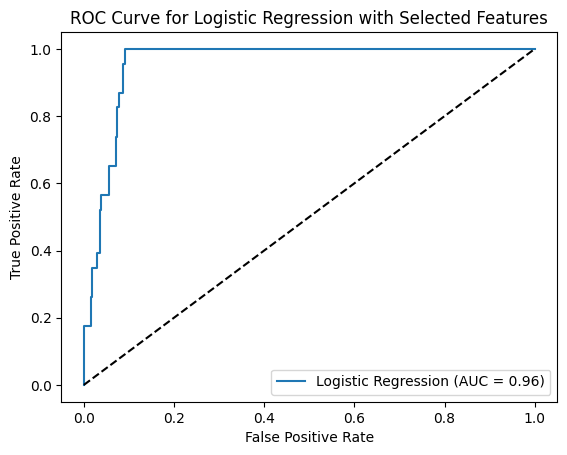

In [ ]:
from sklearn.feature_selection import RFE
# Data Preprocessing
# Handle missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)



# Normalize/Standardize features
scaler = StandardScaler()
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target
X = data.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train a Random Forest model to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the Random Forest model
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Step 2: Use RFE (Recursive Feature Elimination) with Logistic Regression for backward selection
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the ranking of the features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature']
print("Selected Features:\n", selected_features)

# Train and evaluate the model using selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_val_selected)
y_pred_proba = best_model.predict_proba(X_val_selected)[:, 1]

print("\nModel Performance with Selected Features:")
print(classification_report(y_val, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_val, y_pred_proba)}")

# Plot ROC Curve for the best model
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with Selected Features')
plt.legend(loc='best')
plt.show()

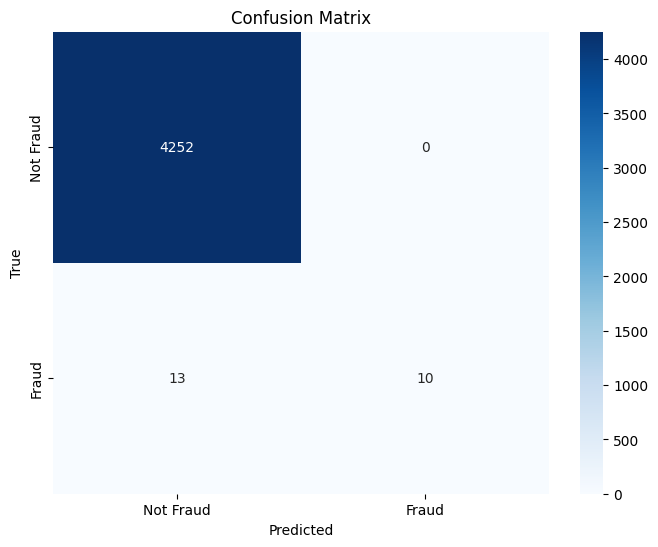

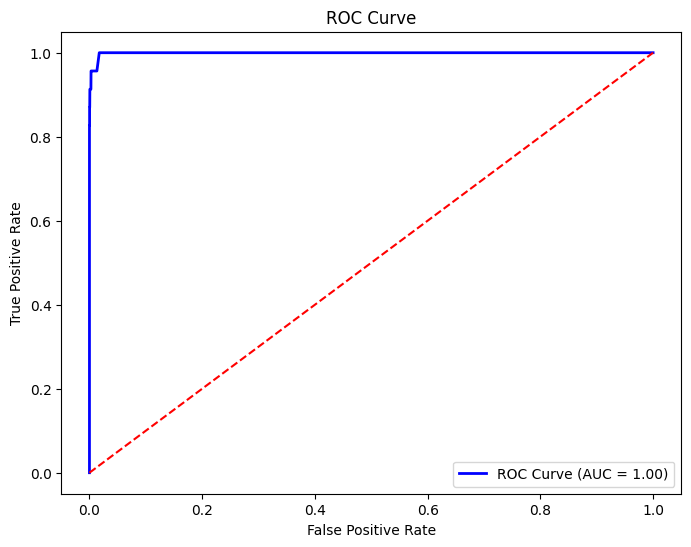

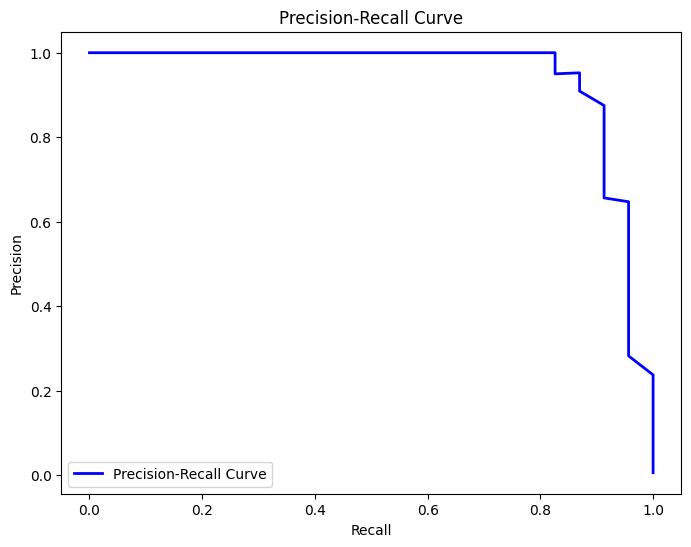

Cross-Validation ROC-AUC Scores: [0.99915094 0.99965817 0.99968243 0.99836509 0.96631221]
Mean ROC-AUC: 0.99 ± 0.01

Model Performance Summary:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4252
         1.0       1.00      0.43      0.61        23

    accuracy                           1.00      4275
   macro avg       1.00      0.72      0.80      4275
weighted avg       1.00      1.00      1.00      4275

ROC-AUC: 1.00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
!pip install plot_confusion_matrix
import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize/Standardize features
scaler = StandardScaler()
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target
X = data.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest model as an example
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Model Performance Summary
print("\nModel Performance Summary:")
print(classification_report(y_val, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_val, y_pred_proba):.2f}")

Feature Importances:
           Feature  Importance
5  newbalanceDest    0.222736
4  oldbalanceDest    0.218653
1          amount    0.208962
2   oldbalanceOrg    0.193011
0            step    0.065905
3  newbalanceOrig    0.044674
9   type_TRANSFER    0.020269
6   type_CASH_OUT    0.012797
8    type_PAYMENT    0.011399
7      type_DEBIT    0.001594


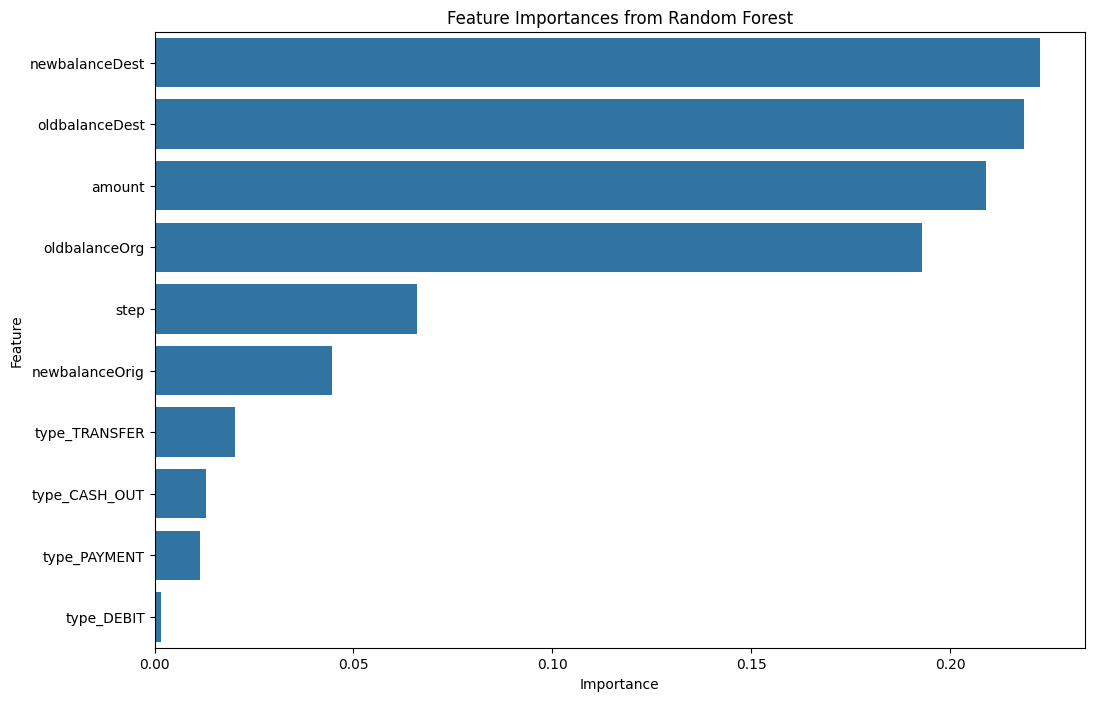

In [ ]:
# Get feature importances from the Random Forest model
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

In [15]:
# Interpretation of Key Factors
top_features = feature_importances.head(10)
print("\nTop Features and Interpretation:")
for feature in top_features['Feature']:
    print(f"Feature: {feature}")
    if feature == 'amount':
        print(" - Transactions with higher amounts are more likely to be scrutinized and potentially fraudulent.")
    elif feature == 'oldbalanceOrg':
        print(" - Original balance before transaction. Unusual changes might indicate fraud.")
    elif feature == 'newbalanceOrig':
        print(" - New balance after transaction. Discrepancies here can signal fraudulent activities.")
    elif feature == 'oldbalanceDest':
        print(" - Destination account's balance before the transaction. Unusual large balances may be flagged.")
    elif feature == 'newbalanceDest':
        print(" - Destination account's balance after the transaction. Significant changes could indicate fraud.")
    elif feature.startswith('type_'):
        print(" - Type of transaction (e.g., CASH_OUT, TRANSFER). Some types are more prone to fraud.")
    else:
        print(" - Domain-specific feature. Analysis based on observed data patterns.")


Top Features and Interpretation:
Feature: newbalanceDest
 - Destination account's balance after the transaction. Significant changes could indicate fraud.
Feature: oldbalanceDest
 - Destination account's balance before the transaction. Unusual large balances may be flagged.
Feature: amount
 - Transactions with higher amounts are more likely to be scrutinized and potentially fraudulent.
Feature: oldbalanceOrg
 - Original balance before transaction. Unusual changes might indicate fraud.
Feature: step
 - Domain-specific feature. Analysis based on observed data patterns.
Feature: newbalanceOrig
 - New balance after transaction. Discrepancies here can signal fraudulent activities.
Feature: type_TRANSFER
 - Type of transaction (e.g., CASH_OUT, TRANSFER). Some types are more prone to fraud.
Feature: type_CASH_OUT
 - Type of transaction (e.g., CASH_OUT, TRANSFER). Some types are more prone to fraud.
Feature: type_PAYMENT
 - Type of transaction (e.g., CASH_OUT, TRANSFER). Some types are more p